<a href="https://colab.research.google.com/github/sherry-hexichen/Churn-Analysis/blob/master/buildPredictiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decided to use CatBoost Model. 
CatBoost is a machine learning algorithm that uses gradient boosting on decision trees.

In [0]:
pip install catboost --no-cache-dir

In [0]:
import pandas as pd
import numpy as np
import catboost
from catboost import CatBoostClassifier, Pool

In [3]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [0]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['final_data.csv']))

In [5]:
dataset.head()

,Unnamed: 0,id,ro_dealerid,ro_vin,avg_ro_labor_price,avg_ro_parts_price,avg_customerpay,avg_customerpay_value,avg_warrantypay,avg_warrantypay_value,avg_otherpay,avg_otherpay_value,vehicle_warranty_date,vehicle_warranty_mileage,max_ro_mileage,recency,frequency,vehicle_age,last_service_date,cust_postal_code,cust_city,cust_state_code,retained_flag,vehicle_warranty_service_status,market_value,body_class,reliability,luxury,ronum,dealer_postal_code,distance,dealer_location_population,nearby_same_dealer,nearby_third_party
0,0,813621091C6RR6FG6ES377813,5984,1C6RR6FG6ES377813,1621.81,529.75,0.290,647.5062,0.7100,1585.2738,0.0,0.0,2017-08-16T00:00:00.0000000,50000,85100,91,1,4,2018-08-03T00:00:00.0000000,33991,CAPE CORAL,FL,0,0,15829.33,7,58,0,83149,33912,41,79943,0,18
1,1,741557301C4RJEAGXHC707971,5984,1C4RJEAGXHC707971,20.19,22.50,0.500,31.6000,0.5000,11.5150,0.0,0.0,2020-01-01T00:00:00.0000000,100000,16741,85,2,1,2018-08-09T00:00:00.0000000,34134,Bonita Springs,FL,0,1,25679.75,9,50,0,83149,33912,14,79943,0,18
2,2,444285992C4RC1GG0DR788071,5984,2C4RC1GG0DR788071,73.03,208.10,0.770,351.7187,0.2325,77.2702,0.0,0.0,2016-01-01T00:00:00.0000000,100000,38798,137,4,5,2018-06-18T00:00:00.0000000,33903,N FT MYERS,FL,0,0,16081.72,6,64,0,83149,33912,27,79943,0,18
3,3,736167701C3CDFAA3FD435371,5984,1C3CDFAA3FD435371,69.10,0.00,0.250,0.0000,0.7500,112.0850,0.0,0.0,2018-01-01T00:00:00.0000000,50000,28092,91,2,3,2018-08-03T00:00:00.0000000,33914,Cape coral,FL,0,0,11321.47,8,58,0,83149,33912,4,79943,0,18
4,4,119974743D4PG5FV0AT231062,5984,3D4PG5FV0AT231062,144.02,139.40,0.834,380.4981,0.1660,93.6399,0.0,0.0,2014-01-14T00:00:00.0000000,50000,59394,141,5,8,2018-06-14T00:00:00.0000000,33957,SANIBEL,FL,0,0,7458.59,4,58,0,83149,33912,59,79943,0,18


In [0]:
dataset = dataset.drop(['Unnamed: 0', 'id'], axis=1)
dataset = dataset[dataset['retained_flag'] != 2]

In [7]:
dataset.columns

Index(['ro_dealerid', 'ro_vin', 'avg_ro_labor_price', 'avg_ro_parts_price',
       'avg_customerpay', 'avg_customerpay_value', 'avg_warrantypay',
       'avg_warrantypay_value', 'avg_otherpay', 'avg_otherpay_value',
       'vehicle_warranty_date', 'vehicle_warranty_mileage', 'max_ro_mileage',
       'recency', 'frequency', 'vehicle_age', 'last_service_date',
       'cust_postal_code', 'cust_city', 'cust_state_code', 'retained_flag',
       'vehicle_warranty_service_status', 'market_value', 'body_class',
       'reliability', 'luxury', 'ronum', 'dealer_postal_code', 'distance',
       'dealer_location_population', 'nearby_same_dealer',
       'nearby_third_party'],
      dtype='object')

Numerical Variables and Categorical Variables

In [0]:
numVar = ['avg_ro_labor_price', 'avg_ro_parts_price', 'avg_customerpay', 'avg_customerpay_value',
       'avg_warrantypay', 'avg_warrantypay_value', 'avg_otherpay',
       'avg_otherpay_value','vehicle_warranty_mileage', 'max_ro_mileage','recency',
       'frequency', 'vehicle_age','market_value','reliability','distance']
catVar = ['vehicle_warranty_service_status','body_class','luxury',
                  'ronum','dealer_location_population','nearby_same_dealer', 'nearby_third_party']

Predictive Variables and Target Variable

In [0]:
features = dataset[['avg_ro_labor_price', 'avg_ro_parts_price', 'avg_customerpay', 'avg_customerpay_value',
       'avg_warrantypay', 'avg_warrantypay_value', 'avg_otherpay',
       'avg_otherpay_value','vehicle_warranty_mileage', 'max_ro_mileage','recency',
       'frequency', 'vehicle_age','market_value','reliability','distance',
       'vehicle_warranty_service_status','body_class','luxury',
                  'ronum','dealer_location_population','nearby_same_dealer', 'nearby_third_party']]
target = dataset[['retained_flag']]

check whether the variable types are correct <br/>
some categorical variables that contain levels should be recognized as "Categorical"

In [12]:
features.dtypes

avg_ro_labor_price                 float64
avg_ro_parts_price                 float64
avg_customerpay                    float64
avg_customerpay_value              float64
avg_warrantypay                    float64
avg_warrantypay_value              float64
avg_otherpay                       float64
avg_otherpay_value                 float64
vehicle_warranty_mileage             int64
max_ro_mileage                       int64
recency                              int64
frequency                            int64
vehicle_age                          int64
market_value                       float64
reliability                          int64
distance                             int64
vehicle_warranty_service_status      int64
body_class                           int64
luxury                               int64
ronum                                int64
dealer_location_population           int64
nearby_same_dealer                   int64
nearby_third_party                   int64
dtype: obje

In [0]:
features['vehicle_warranty_service_status'] = pd.Categorical(features.vehicle_warranty_service_status)
features['body_class'] = pd.Categorical(features.body_class)
features['luxury'] = pd.Categorical(features.luxury)
features['ronum'] = pd.Categorical(features.ronum)
features['dealer_location_population'] = pd.Categorical(features.dealer_location_population)
features['nearby_same_dealer'] = pd.Categorical(features.nearby_same_dealer)
features['nearby_third_party'] = pd.Categorical(features.nearby_third_party)

In [14]:
features.dtypes

avg_ro_labor_price                  float64
avg_ro_parts_price                  float64
avg_customerpay                     float64
avg_customerpay_value               float64
avg_warrantypay                     float64
avg_warrantypay_value               float64
avg_otherpay                        float64
avg_otherpay_value                  float64
vehicle_warranty_mileage              int64
max_ro_mileage                        int64
recency                               int64
frequency                             int64
vehicle_age                           int64
market_value                        float64
reliability                           int64
distance                              int64
vehicle_warranty_service_status    category
body_class                         category
luxury                             category
ronum                              category
dealer_location_population         category
nearby_same_dealer                 category
nearby_third_party              

In [0]:
target['retained_flag'] = pd.Categorical(target.retained_flag)

In [16]:
target.dtypes

retained_flag    category
dtype: object

*cat_features* is a parameter in the CatBoost Classifier Model. <br />
It is a one-dimensional array of categorical columns indices (specified as integers) or names (specified as strings). <br />
This array can contain both indices and names for different elements.

In [17]:
catFeatureIndex = np.array([features.columns.get_loc(var) for var in catVar if var in features])
catFeatureIndex

array([16, 17, 18, 19, 20, 21, 22])

Split training data and test data for the purpose of model training and validation.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.20, random_state=0, stratify = target)

In [0]:
catboost_pool = Pool(X_train, Y_train, cat_features=catFeatureIndex)

In [0]:
eval_dataset = Pool(X_test, Y_test, cat_features=catFeatureIndex)

In [0]:
model = CatBoostClassifier(iterations=500)

In [0]:
model.fit(X_train, Y_train, cat_features=catFeatureIndex, eval_set=eval_dataset)

In [23]:
# make the prediction using the resulting model
preds_class = model.predict(X_test)

preds_proba = model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba) # return the predicted probability of being 0 and being 1

class =  [1 1 1 ... 1 1 1]
proba =  [[0.44802077 0.55197923]
 [0.31521513 0.68478487]
 [0.37443124 0.62556876]
 ...
 [0.31655098 0.68344902]
 [0.43100822 0.56899178]
 [0.41845261 0.58154739]]


Plot the ROC Curve

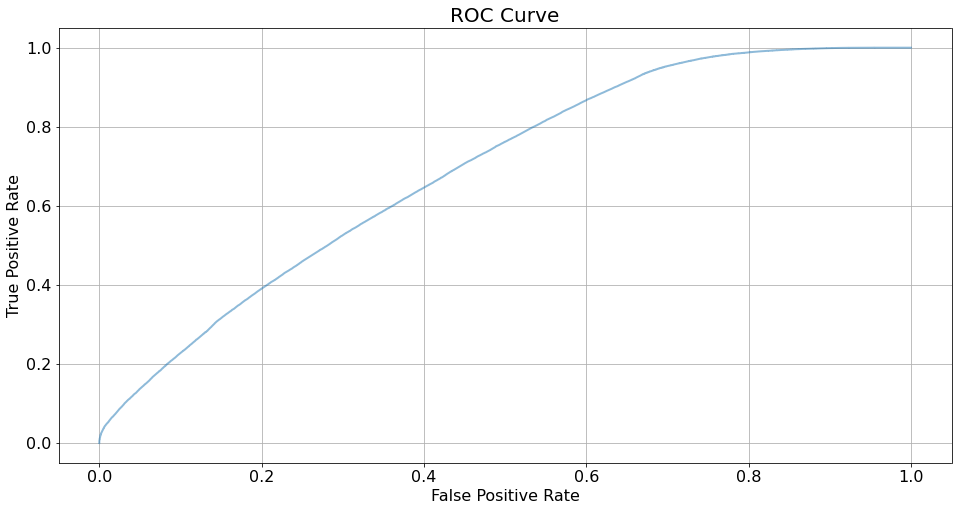

[0.         0.         0.         ... 0.99995373 0.99998458 1.        ]
[0.00000000e+00 1.31814827e-05 2.63629653e-05 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[1.         0.9905326  0.98588836 ... 0.00237866 0.00204028 0.        ]


In [25]:
from catboost.utils import get_roc_curve, select_threshold
(fpr, tpr, thresholds) = get_roc_curve(model, catboost_pool, plot=True)
print(fpr)
print(tpr)
print(thresholds)

In [26]:
roc_curve_values = get_roc_curve(model, catboost_pool)

# Return the probability boundary required to achieve the specified false positive or false negative rate.
boundary = select_threshold(model, 
                            curve=roc_curve_values,  
                            FPR = 0.01) # FPR = False Positive Rate
print(boundary)

0.7092733291878346


A function that can return the **Confusion Matrix**

In [0]:
from sklearn.metrics import confusion_matrix
def CreateConfusion(Y_test,Y_pred,text='initial'):

    cm = confusion_matrix(Y_test,Y_pred)
    print(cm)

    accuracy = (cm[0,0]+cm[1,1]) / cm.sum()
    specificity = cm[1,1] / (cm[1,0] + cm[1,1])
    sensitivity = cm[0,0] / (cm[0,1] + cm[0,0])

    print("The metrics for the %s Model are: \n Accuracy: %f \n Specificity: %f \n Sensitivity: %f" % (text,accuracy,specificity,sensitivity) )
    
    return cm

In [28]:
CreateConfusion(Y_test, preds_class)

[[ 5231 10980]
 [ 1548 17418]]
The metrics for the initial Model are: 
 Accuracy: 0.643858 
 Specificity: 0.918380 
 Sensitivity: 0.322682


array([[ 5231, 10980],
       [ 1548, 17418]])

Investigate the important features that contribute the most in predicting the probability of 0 or 1.

In [29]:
model.get_feature_importance()

array([ 1.48579893,  2.3520514 ,  1.93997464,  3.90382349,  1.0121118 ,
        1.82775384,  1.79784276,  0.44968813,  0.69288901,  1.89240506,
       11.19967787,  3.99068351,  2.14089328,  1.96538384,  2.65638386,
       40.17798959,  0.0585699 ,  0.88626052,  0.05401029,  2.27471312,
        2.00360579, 14.72060061,  0.51688874])

A vector  with contributions of each feature to the prediction for every input object and the expected value of the model prediction for the object (average prediction given no knowledge about the object). <br />
Also known as "SHAP Values".

In [0]:
pip install shap

In [31]:
import shap

shap_values = model.get_feature_importance(Pool(X_test, label=Y_test,cat_features=catFeatureIndex), 
                                                                     type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X_test.iloc[3,:])

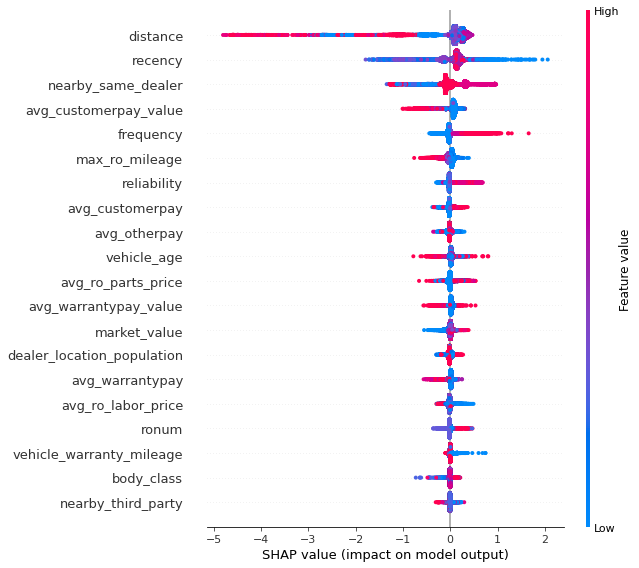

In [32]:
shap.summary_plot(shap_values, X_test)

The purpose of building this predictive model is to identifying the portion of customers who are most likely to churn, given the huge number of customers in the records. As there exists budget constraints in marketing, we would want the model to tell us who are the customer we need to concern. Therefore, we sort the customers from the highest lost probability to the lowest lost probability and divide them evenly into deciles.

In [0]:
panel = features.copy()
panel['retained_flag'] = target

In [0]:
panel_proba = model.predict_proba(features)

In [0]:
panel_pred_class = model.predict(features)

In [0]:
panel_pred_class = list(panel_pred_class)

In [0]:
pred_loss_prob = []
for p in range(len(panel_proba)):
  pred_loss_prob.append(panel_proba[p][0])

In [0]:
panel['predLossProb'] = pred_loss_prob
panel['predClass'] = panel_pred_class

In [44]:
panel.head()

,avg_ro_labor_price,avg_ro_parts_price,avg_customerpay,avg_customerpay_value,avg_warrantypay,avg_warrantypay_value,avg_otherpay,avg_otherpay_value,vehicle_warranty_mileage,max_ro_mileage,recency,frequency,vehicle_age,market_value,reliability,distance,vehicle_warranty_service_status,body_class,luxury,ronum,dealer_location_population,nearby_same_dealer,nearby_third_party,retained_flag,predLossProb,predClass
0,1621.81,529.75,0.290,647.5062,0.7100,1585.2738,0.0,0.0,50000,85100,91,1,4,15829.33,58,41,0,7,0,83149,79943,0,18,0,0.844924,0
1,20.19,22.50,0.500,31.6000,0.5000,11.5150,0.0,0.0,100000,16741,85,2,1,25679.75,50,14,1,9,0,83149,79943,0,18,0,0.391243,1
2,73.03,208.10,0.770,351.7187,0.2325,77.2702,0.0,0.0,100000,38798,137,4,5,16081.72,64,27,0,6,0,83149,79943,0,18,0,0.588950,0
3,69.10,0.00,0.250,0.0000,0.7500,112.0850,0.0,0.0,50000,28092,91,2,3,11321.47,58,4,0,8,0,83149,79943,0,18,0,0.867458,0
4,144.02,139.40,0.834,380.4981,0.1660,93.6399,0.0,0.0,50000,59394,141,5,8,7458.59,58,59,0,4,0,83149,79943,0,18,0,0.614993,0


In [0]:
sortPanel = panel.sort_values("predLossProb", ascending = False)

In [46]:
decilePanel = panel.copy()
decilePanel['decile'] = pd.qcut(decilePanel['predLossProb'], 10, labels=False)
decilePanel.head()

,avg_ro_labor_price,avg_ro_parts_price,avg_customerpay,avg_customerpay_value,avg_warrantypay,avg_warrantypay_value,avg_otherpay,avg_otherpay_value,vehicle_warranty_mileage,max_ro_mileage,recency,frequency,vehicle_age,market_value,reliability,distance,vehicle_warranty_service_status,body_class,luxury,ronum,dealer_location_population,nearby_same_dealer,nearby_third_party,retained_flag,predLossProb,predClass,decile
0,1621.81,529.75,0.290,647.5062,0.7100,1585.2738,0.0,0.0,50000,85100,91,1,4,15829.33,58,41,0,7,0,83149,79943,0,18,0,0.844924,0,9
1,20.19,22.50,0.500,31.6000,0.5000,11.5150,0.0,0.0,100000,16741,85,2,1,25679.75,50,14,1,9,0,83149,79943,0,18,0,0.391243,1,3
2,73.03,208.10,0.770,351.7187,0.2325,77.2702,0.0,0.0,100000,38798,137,4,5,16081.72,64,27,0,6,0,83149,79943,0,18,0,0.588950,0,8
3,69.10,0.00,0.250,0.0000,0.7500,112.0850,0.0,0.0,50000,28092,91,2,3,11321.47,58,4,0,8,0,83149,79943,0,18,0,0.867458,0,9
4,144.02,139.40,0.834,380.4981,0.1660,93.6399,0.0,0.0,50000,59394,141,5,8,7458.59,58,59,0,4,0,83149,79943,0,18,0,0.614993,0,8


To evaluate the model, we want to use a metric called **LIFT**. Lift can tell us how much better selecting a subset using the model is, compared to selecting randomly. This should be done for every decile.

In [0]:
calculate = pd.DataFrame()

In [0]:
minProb = list(decilePanel.groupby(['decile'])['predLossProb'].min())

In [0]:
calculate['minProb'] = minProb

In [0]:
maxProb = list(decilePanel.groupby(['decile'])['predLossProb'].max())
calculate['maxProb'] = maxProb

In [0]:
numOfCust = list(decilePanel.groupby(['decile']).size())
calculate['numOfCustomer'] = numOfCust

In [0]:
calculate['cumNumOfCustomer'] = calculate['numOfCustomer'].cumsum(axis = 0) 

In [0]:
total = decilePanel.groupby(['decile']).size()

In [0]:
retainStatus = decilePanel.groupby(['decile'])['retained_flag'].value_counts()

In [57]:
calculate

,minProb,maxProb,numOfCustomer,cumNumOfCustomer
0,0.008445,0.311002,17590,17590
1,0.311003,0.332619,17589,35179
2,0.332626,0.385680,17586,52765
3,0.385688,0.400495,17593,70358
4,0.400500,0.411151,17585,87943
5,0.411159,0.432202,17587,105530
6,0.432207,0.448931,17589,123119
7,0.448933,0.479618,17586,140705
8,0.479665,0.774877,17588,158293
9,0.774879,0.999061,17588,175881


In [58]:
predRetainStatus = decilePanel.groupby(['decile'])['predClass'].value_counts()
predRetainStatus

decile  predClass
0       1            17590
1       1            17589
2       1            17586
3       1            17593
4       1            17585
5       1            17587
6       1            17589
7       1            17586
8       0            15994
        1             1594
9       0            17588
Name: predClass, dtype: int64

In [0]:
predLoss = [0,0,0,0,0,0,0,0,16053,17588]
calculate['predLoss'] = predLoss

In [0]:
trueLoss = []
for i in range(0,10):
  trueLoss.append(retainStatus[i][0])

In [61]:
trueLoss

[4450, 5672, 6158, 6859, 7135, 7324, 7803, 8159, 11161, 16330]

In [0]:
calculate['trueLoss'] = trueLoss

In [0]:
calculate['trueLossRate'] = calculate['trueLoss'] / calculate['numOfCustomer']

In [64]:
calculate

,minProb,maxProb,numOfCustomer,cumNumOfCustomer,predLoss,trueLoss,trueLossRate
0,0.008445,0.311002,17590,17590,0,4450,0.252985
1,0.311003,0.332619,17589,35179,0,5672,0.322474
2,0.332626,0.385680,17586,52765,0,6158,0.350165
3,0.385688,0.400495,17593,70358,0,6859,0.389871
4,0.400500,0.411151,17585,87943,0,7135,0.405744
5,0.411159,0.432202,17587,105530,0,7324,0.416444
6,0.432207,0.448931,17589,123119,0,7803,0.443630
7,0.448933,0.479618,17586,140705,0,8159,0.463949
8,0.479665,0.774877,17588,158293,16053,11161,0.634580
9,0.774879,0.999061,17588,175881,17588,16330,0.928474


In [0]:
calculate['cumTrueLoss'] = calculate['trueLoss'].cumsum(axis = 0) 

In [68]:
calculate

,minProb,maxProb,numOfCustomer,cumNumOfCustomer,predLoss,trueLoss,trueLossRate,cumTrueLoss
0,0.008445,0.311002,17590,17590,0,4450,0.252985,4450
1,0.311003,0.332619,17589,35179,0,5672,0.322474,10122
2,0.332626,0.385680,17586,52765,0,6158,0.350165,16280
3,0.385688,0.400495,17593,70358,0,6859,0.389871,23139
4,0.400500,0.411151,17585,87943,0,7135,0.405744,30274
5,0.411159,0.432202,17587,105530,0,7324,0.416444,37598
6,0.432207,0.448931,17589,123119,0,7803,0.443630,45401
7,0.448933,0.479618,17586,140705,0,8159,0.463949,53560
8,0.479665,0.774877,17588,158293,16053,11161,0.634580,64721
9,0.774879,0.999061,17588,175881,17588,16330,0.928474,81051


In [0]:
avgLoss = 81051/10

In [71]:
calculate['lift'] = calculate['trueLoss'] / avgLoss
calculate['decile'] = [10,9,8,7,6,5,4,3,2,1]
calculate

,minProb,maxProb,numOfCustomer,cumNumOfCustomer,predLoss,trueLoss,trueLossRate,cumTrueLoss,lift,decile
0,0.008445,0.311002,17590,17590,0,4450,0.252985,4450,0.549037,10
1,0.311003,0.332619,17589,35179,0,5672,0.322474,10122,0.699806,9
2,0.332626,0.385680,17586,52765,0,6158,0.350165,16280,0.759769,8
3,0.385688,0.400495,17593,70358,0,6859,0.389871,23139,0.846257,7
4,0.400500,0.411151,17585,87943,0,7135,0.405744,30274,0.880310,6
5,0.411159,0.432202,17587,105530,0,7324,0.416444,37598,0.903629,5
6,0.432207,0.448931,17589,123119,0,7803,0.443630,45401,0.962727,4
7,0.448933,0.479618,17586,140705,0,8159,0.463949,53560,1.006650,3
8,0.479665,0.774877,17588,158293,16053,11161,0.634580,64721,1.377034,2
9,0.774879,0.999061,17588,175881,17588,16330,0.928474,81051,2.014781,1
